In [1]:
!git clone https://github.com/LukasWolff2002/TAREA_2_FINITE

Clonando en 'TAREA_2_FINITE'...
remote: Enumerating objects: 253, done.
remote: Counting objects: 100% (253/253), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 253 (delta 117), reused 222 (delta 86), pack-reused 0 (from 0)
Recibiendo objetos: 100% (253/253), 90.53 KiB | 759.00 KiB/s, listo.
Resolviendo deltas: 100% (117/117), listo.


In [2]:
%cd TAREA_2_FINITE/ENTREGA_2/

/Users/lukaswolff/Desktop/PRUEBA/TAREA_2_FINITE/ENTREGA_2


In [3]:
from nodes import Node
import numpy as np
import matplotlib.pyplot as plt
from section import Section
from cst import CST
from solve import Solve
from graph import plot_full_structure
from assembly import Structure
from main import Run_script

In [4]:
b = 300 #mm
h = 300 #mm
L = 3000 #mm

gamma = (7800 * 9.81)/1000**3 #N/mm3
q = gamma*b*h #N/mm

E = 210000 #Mpa

Para una viga en voladizo con peso propio, el desplazamiento se puede calcular como:

$$
\delta = \left( \frac{q \cdot L^4}{8EI_y} \right)
$$

Mientras que para una carga axial, el desplazamiento es:

$$
\delta = \left( \frac{P \cdot L}{AE} \right)
$$

In [5]:
Px = 1000000

I = (b*h**3)/12
A = b*h
delta_y = (q*L**4)/(8*E*I)
delta_x = (Px*L)/(A*E)

print(f'Los desplazamientos teoricos para una carga de pes {q} N/mm^3 son {delta_y} mm')
print(f'Los desplazamientos teoricos para una carga en X {Px} N son {delta_x} mm')


Los desplazamientos teoricos para una carga de pes 6.886620000000001 N/mm^3 son 0.4919014285714286 mm
Los desplazamientos teoricos para una carga en X 1000000 N son 0.15873015873015872 mm


# Caso Ejemplo

Un caso ejemplo para visualizar la implementacion del codigo es el siguiente:

Desplazamiento del nodo extremo: ux = 1.755478e-02 mm, uy = -2.691235e-01 mm


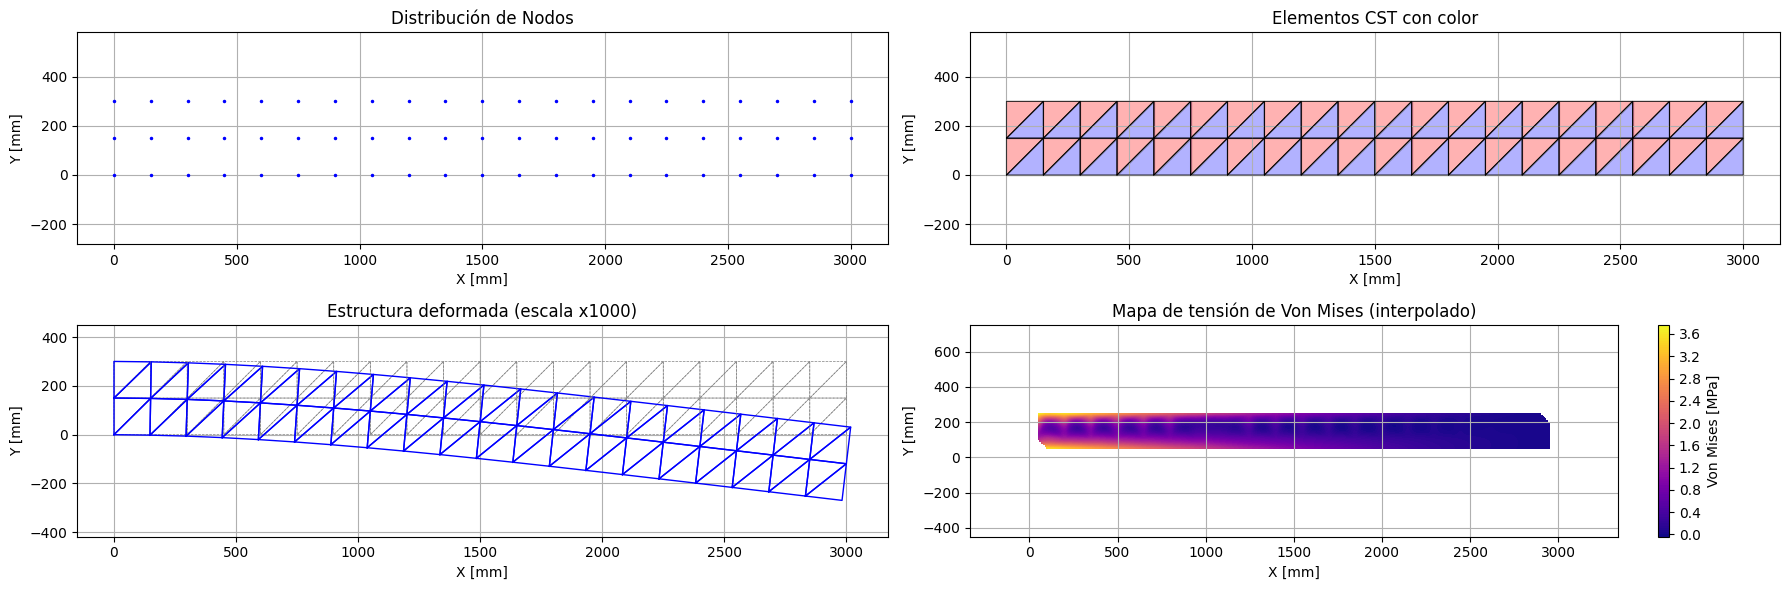

In [6]:
Run_script(E,b,h,L,150,150)

# Problema

Aunque la solucion se acerca al resultado final, se puede mejorar, la pregunta es, cual es el tamaño optimo de un elemento finito?

# Costo Computacional

Es posible evaluar cual es el costo en tiempo por disminuir el tamaño de cada elemento, frente a la ganancia en presicion de resultados. De esta manera, se presenta el siguiente analisis:

In [7]:
from costo_comp import encontrar_convergencia_deformacion_deltas
from graph import  comp_cost

In [8]:
deltas = [150, 100, 75, 60, 50, 30, 25, 15, 10]  # mm
resultados = encontrar_convergencia_deformacion_deltas(b=200, h=400, L=3000, deltas=deltas)



--- Iteración 1 | delta = 150.00 mm ---
Desplazamiento uy = -3.094583e+00 mm | Tiempo = 0.00 s

--- Iteración 2 | delta = 100.00 mm ---
Desplazamiento uy = -3.340573e+00 mm | Variación relativa = 7.95e-02 | Tiempo = 0.01 s

--- Iteración 3 | delta = 75.00 mm ---
Desplazamiento uy = -5.187953e+00 mm | Variación relativa = 5.53e-01 | Tiempo = 0.01 s

--- Iteración 4 | delta = 60.00 mm ---
Desplazamiento uy = -7.098649e+00 mm | Variación relativa = 3.68e-01 | Tiempo = 0.02 s

--- Iteración 5 | delta = 50.00 mm ---
Desplazamiento uy = -6.935560e+00 mm | Variación relativa = 2.30e-02 | Tiempo = 0.03 s

--- Iteración 6 | delta = 30.00 mm ---
Desplazamiento uy = -1.201914e+01 mm | Variación relativa = 7.33e-01 | Tiempo = 0.17 s

--- Iteración 7 | delta = 25.00 mm ---
Desplazamiento uy = -1.362997e+01 mm | Variación relativa = 1.34e-01 | Tiempo = 0.46 s

--- Iteración 8 | delta = 15.00 mm ---
Desplazamiento uy = -2.354107e+01 mm | Variación relativa = 7.27e-01 | Tiempo = 4.76 s

--- Iteración

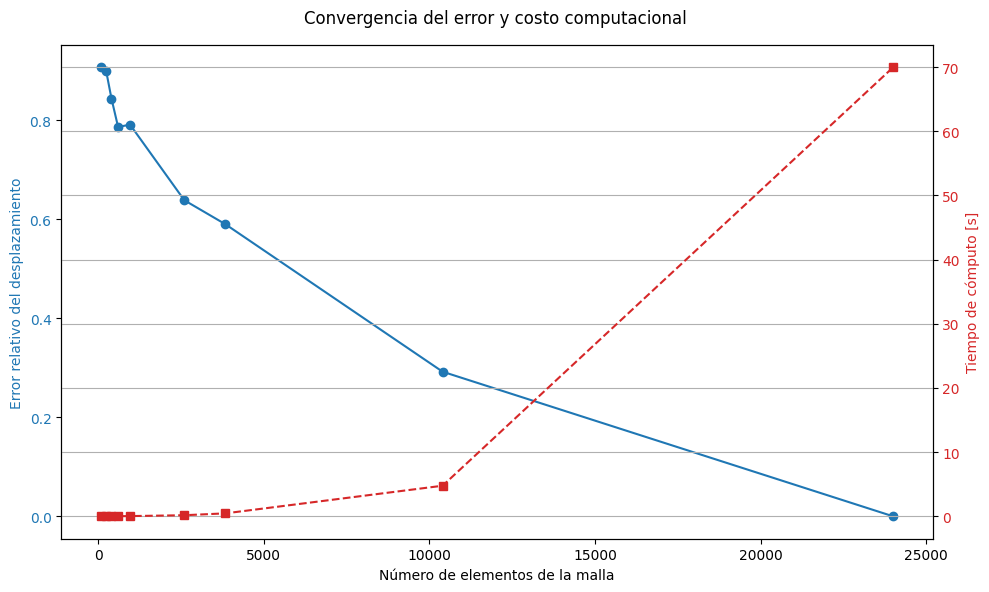

In [9]:
comp_cost(resultados)

# Tipo de elemento a usar

Se puede concluir que el elemento de tamaño 15 mm es el mas eficiente minimizando el error y el tiempo computacional relativo

# Elemento con Carga Vertical

La fuerza de peso propio es aplicada sobre el centroide de cada elemento, de esta forma, es posible interpolar la fuerza respectiva a los nodos como fue demostrado en la entrega 1

Desplazamiento del nodo extremo: ux = 3.266142e-02 mm, uy = -4.946337e-01 mm


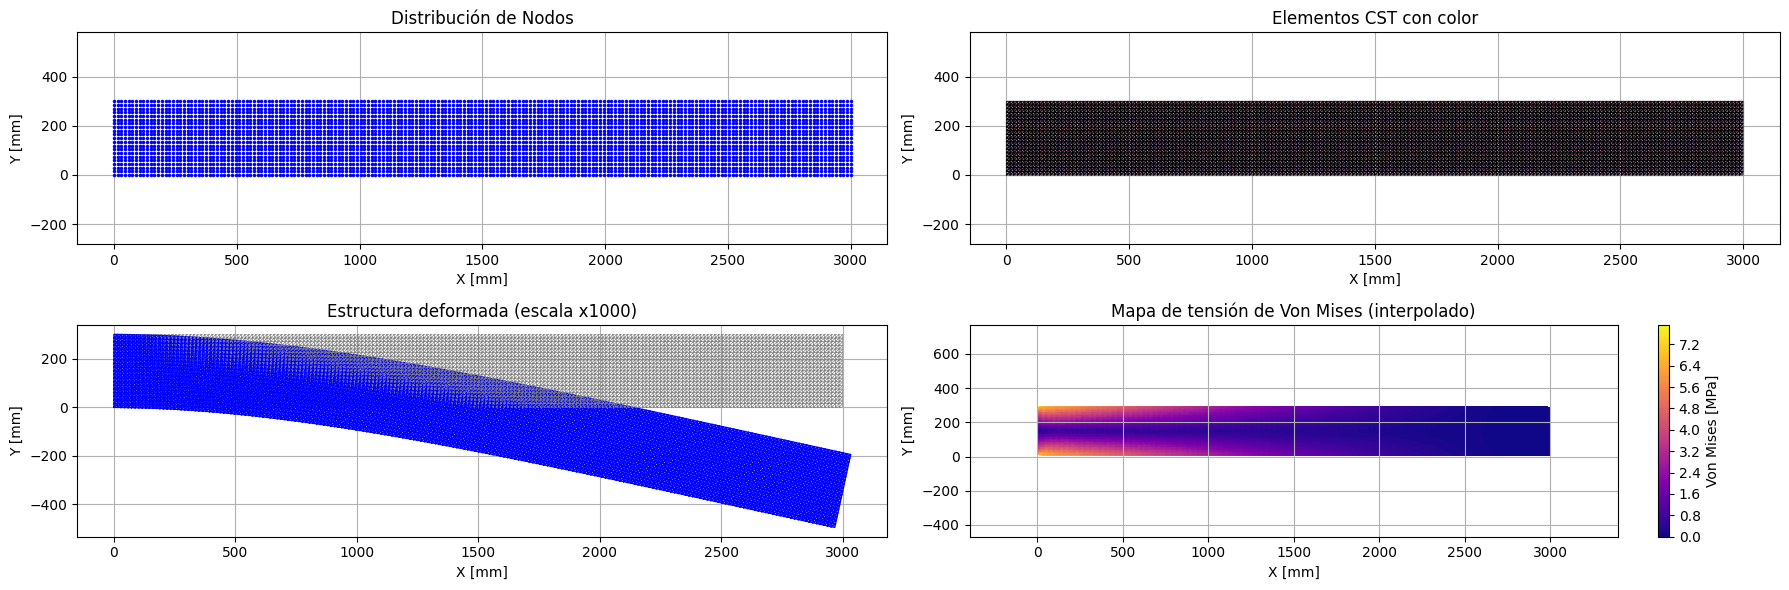

In [10]:
Run_script(E,b,h,L,15,15)

# Elemento con Carga Horizontal

Desplazamiento del nodo extremo: ux = -1.276853e-01 mm, uy = -4.916514e-01 mm


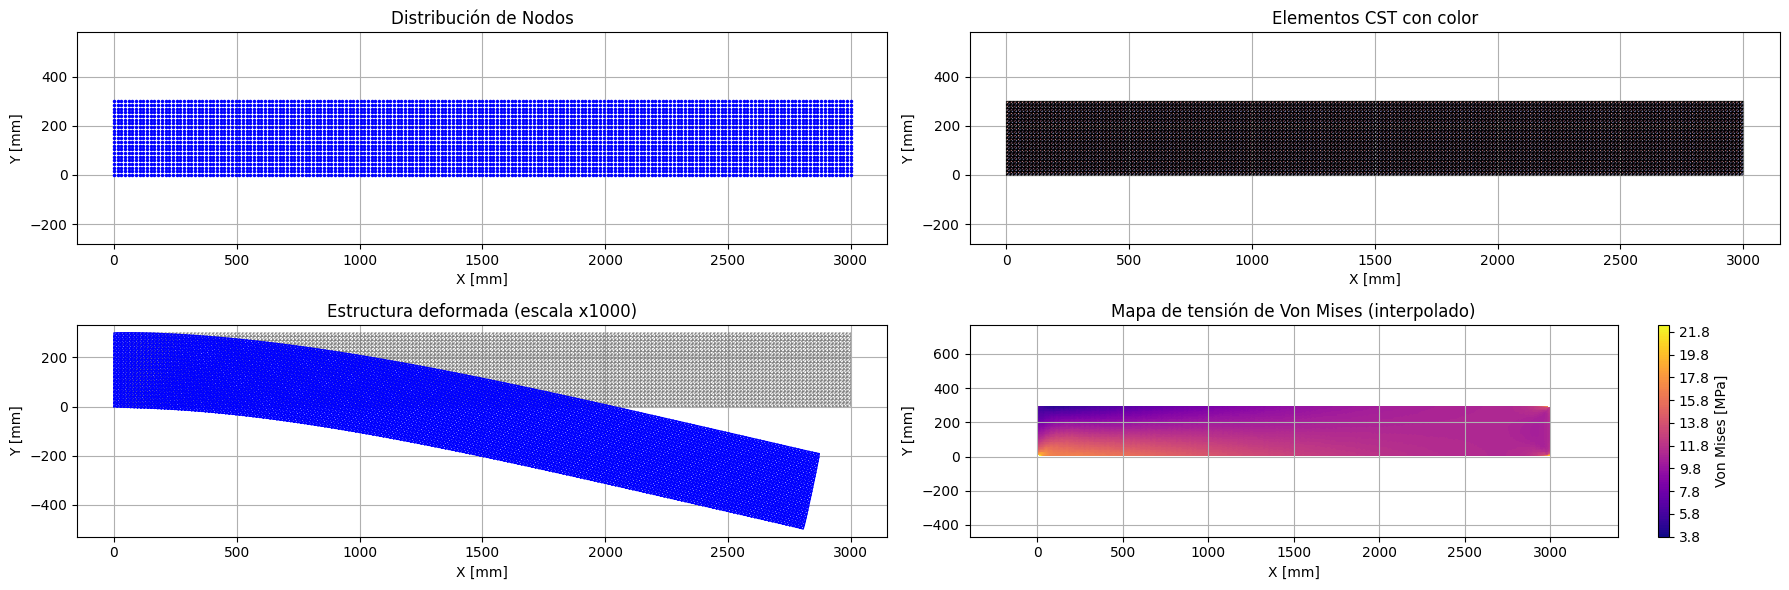

In [11]:
Run_script(E,b,h,L,15,15, Px,True)

# Conclucion

El modelo de elemento finitos es capaz de alcanzar el resultado teorico correctamente

El modelo tiene a subpredecir el resultado teorico, es decir, normalmente los desplazamientos son menores.

La solucion teorica asume una linealidad y continuidad en la distribucion de tensiones y deformaciones, mientras que los elementos finitos son discontinuos. Pero si se disminuye considerablemente el tamaño del elemento, se logra alcanzar una solucion con un alto valor de confianza.